# Table of Contents

1. [**Problem Description**](#1)
2. [**Gurobi**](#2)
3. [**Reference**](#3)

# 1- Problem Description <a id="1"></a>

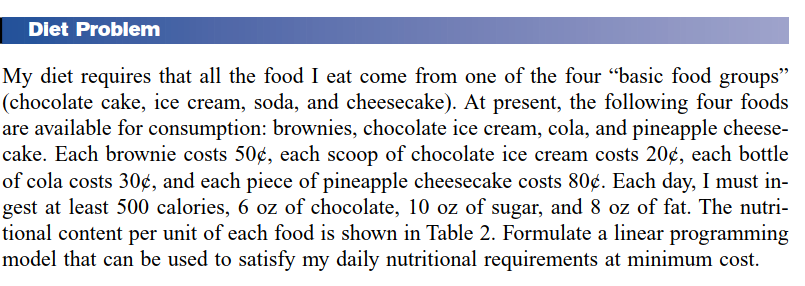

**The noturational content per unit of each food is shown in the following table**
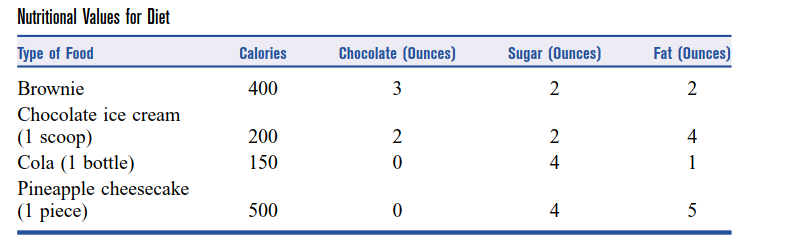

**Sets**:<br>
**I**: set of foods = {Brownie, Chocolate ice cream, Cola, Pineapple cheesecake}

#### Parameters:
**Foods cost**= [50, 20, 30, 80]<br>
**Calories** = [400, 200, 150, 500]<br>
**Chocolate**= [3, 2, 0, 0]<br>
**Sugar**    = [2, 2, 4, 4]<br>
**Fat**      = [2, 4, 1, 5]<br>


**Decision Variable**:<br>
$X_{i}$ = *number of i'th food eaten daily* $\forall i \in I$

**Constraint**:
1. Daily calorie intake must be at least 500 calories.
2. Daily chocolate intake must be at least 6 oz.
3. Daily sugar intake must be at least 10 oz.
4. Daily fat intake must be at least 8 oz

**Objective function**<br>
1. Minimize the cost of her/his diet.

**Mathematical Model**:<br><br>
$$\begin{align}
\min Z = &\sum_{i=0}^{I} Foodscost_{i} * X_{i}\\
\text{S.t}\\
&\sum_{i \in I} Calories_{i} * X_{i} \geq 500\\
&\sum_{i \in I} Chocolate_{i} * X_{i} \geq 6\\
&\sum_{i \in I} Sugar_{i} * X_{i} \geq 10\\
&\sum_{i \in I} Fat_{i} * X_{i} \geq 8\\
& X_{i} \geq 0 &\forall i \in I\\
\end{align}$$

# 2- Gurobi <a id = "2"></a>

In [1]:
from gurobipy import GRB, Model, quicksum
import numpy as np

## Parameters Definition

In [2]:
Variables  = ["Brownie", "Chocolate ice cream", "Cola", "Pineapple cheesecake"]

Foods_cost = [50, 20, 30, 80]

Nutritional_value =np.array([[400, 200, 150, 500], #Calories
                             [3, 2, 0, 0],         #Chocolate
                             [2, 2, 4, 4],         #Sugar
                             [2, 4, 1, 5]])         #Fat

Requirements = [500, 6, 10, 8]


## Model Definition

In [3]:
def output(m):  
    status_code = {1:'LOADED',
                   2: 'OPTIMAL',
                   3:'INFEASIBLE',
                   4:'INF_OR_UNBD',
                   5:'UNBOUNDED'}
    
    status = m.status
    print(f'The optimization status is: {status_code[status]}')
    
    if status == 2:
        print('Optimal solution:')
        for var in m.getVars():
            print(f'{var.varName} = {var.x}')
        print(f'Optimal Objective Function = {m.objVal}')

In [6]:
def Gurobi_Model(variables, foods_cost, content, requirement):
    
    model = Model('Diet')
    
    model.setParam('OutputFlag', True)
    m,n = content.shape
    
    X = model.addVars(n, lb=0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = variables)
    
    model.setObjective( quicksum(foods_cost[j]*X[j] for j in range(n)), GRB.MINIMIZE)
    
    model.addConstrs(quicksum( (content[i][j]*X[j]) for j in range(n) ) >= requirement[i] for i in range(m))
    
    model.optimize()
    
    output(model)

In [7]:
Gurobi_Model(Variables, Foods_cost, Nutritional_value, Requirements)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-4210U CPU @ 1.70GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 4 rows, 4 columns and 14 nonzeros
Model fingerprint: 0x1ad249d8
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [2e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 5e+02]
Presolve time: 0.03s
Presolved: 4 rows, 4 columns, 14 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.512500e+02   0.000000e+00      0s
       2    9.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.06 seconds (0.00 work units)
Optimal objective  9.000000000e+01
The optimization status is: OPTIMAL
Optimal solution:
Brownie = 0.0
Chocolate ice cream = 3.0
Cola = 1.0
Pineapple cheesecake = 0.0
Optimal Objective Function = 90.0


# 3- Reference <a id='3'></a>
[**Operations Research** Wayne L.Winston, page69](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)